
# MARKOV CHAINS


WHAT ARE MARKOV CHAINS??

A stochastic process containing random variables, transitioning from one state to another depending on certain assumptions and definite probabilistic rules.
These random variables transition from one to state to the other, based on an important mathematical property called Markov Property

Discrete Time Markov Property states that the calculated probability of a random process transitioning to the next possible state is only dependent on the current state and time and it is independent of the series of states that preceded it.

The fact that the next possible action/ state of a random process does not depend on the sequence of prior states, renders Markov chains as a memory-less process that solely depends on the current state/action of a variable.

What this means is, we will have an “agent” that randomly jumps around different states, with a certain probability of going from each state to another one.

To show what a Markov Chain looks like, we can use a digraph, where each node is a state (with a label or associated data), and the weight of the edge that goes from node a to node b is the probability of jumping from state a to state b.
Here’s an example,

Mathematically:
Let the random process be, {Xm, m=0,1,2,⋯}.

This process is a Markov chain only if,

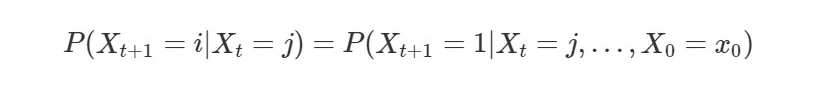

In [2]:
from IPython.display import Image
Image("C:/Users/pksds/Documents/mycourse/practice_python/ma1.png")

for all m, j, i, i0, i1, ⋯ im−1

For a finite number of states, S={0, 1, 2, ⋯, r}, this is called a finite Markov chain.

The left hand side of this equation is giving the probability of being in State  i  at period  t+1 , given that we were in State  j  at period  t . In our case above, the probability of being at State 1 at time  t+1  given that we are in State 2 at time  t  is .1. Then, the right hand side of the equation is the probability of being at State  i  at time  t+1  given the entire past history of the chain, or the location of the particle in every single State (here, the State  j  at time  t , and all the way down to  x0 , which is just arbitrary notation for some constant that  X0  takes on at time 0).

The Markov Property states that these sides are equal; that is, knowing where you were in the previous period makes the rest of the chain history irrelevant. If we know  Xt=j , then the rest of the history doesn’t add any information for predicting  Xt+1 ; that’s why the two sides are equal.



Markov Chains are actually extremely intuitive. Formally, they are examples of Stochastic Processes, or random variables that evolve over time. Here is a basic but classic example of what a Markov chain can actually look like:

  # State Diagram 

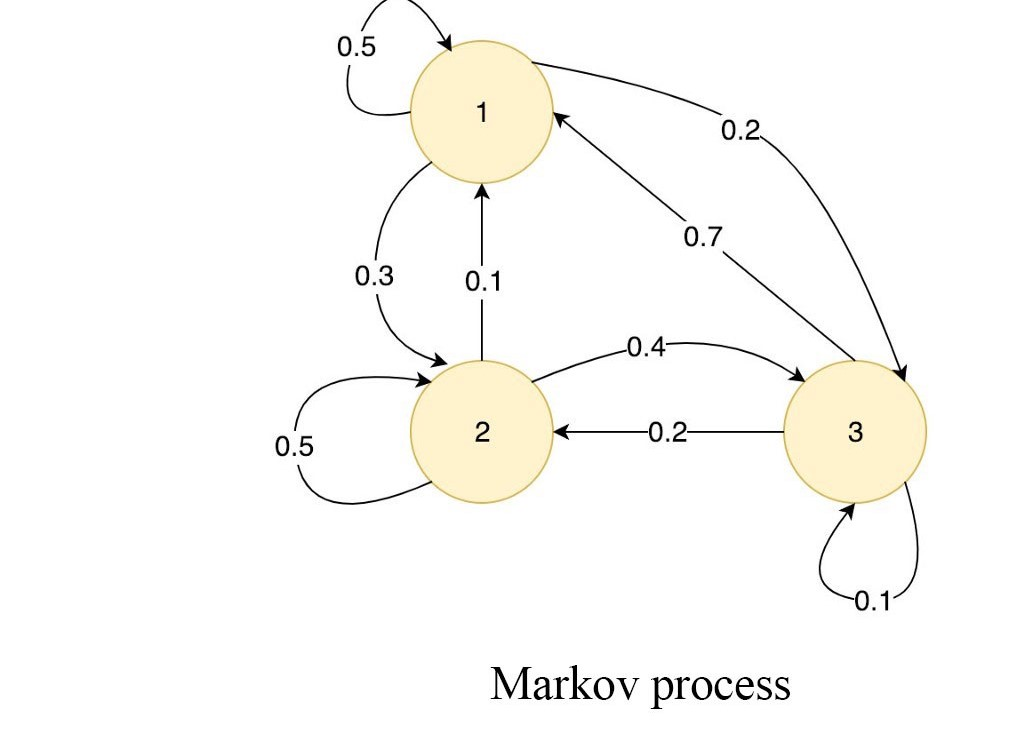

In [3]:

Image("C:/Users/pksds/Documents/mycourse/practice_python/state_diag1.jpeg")


In this simple example, we’re assuming that we can land in either be 1,2 or 3 . If the current state is 1, then  there is a .2 probability that we will transit to state 2, and a .5 probability that we remains in the same state .If in state 2, then  there is a .5 probability that it reamins in the state again  and a .4 probability that we land in 3 next move. We can envision a particle bouncing around this chain, moving according to the probabilities drawn here.

# Transition Matrix

Transition Matrix, which we usually notate as  Q .This is simply the matrix that contains the probabilities of, you guessed it, transferring between nodes. In this case, the transition matrix looks like:

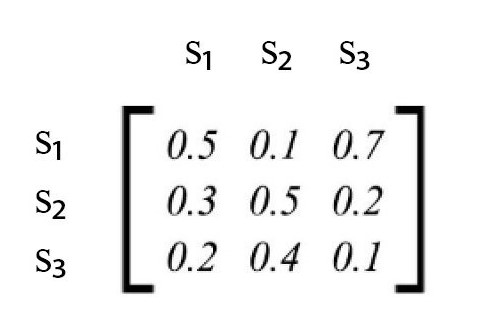

In [4]:
Image("C:/Users/pksds/Documents/mycourse/practice_python/transition_matrix.jpeg")


These are also intuitive to read: the  {ith,jth}  entry (the value in the  ith  row and  jth  column) marks the probability of going from State  i  to State  j . In this case, we named the states instead of numbering them.Here, then, we associate the first row and first column with the '1' state, and the second row and column with the '2' state and the third row and column with the '3' state .

For example, the probability of going from '1' to '2' is coded here in the first row and second column  is 0.1  ,  the probability of going from '2' to '3' is coded here in the second row and third column  is 0.2 , probability of remaining in the state '2'  is 0.5. In this way, we can find the probability of going from a state to another state from Transition Matrix.

It’s important to note, again, that the rows of these transition matrices must sum to 1. That’s because from a certain state, we must go somewhere. Again, if these probabilities added up to something like .6, we wouldn’t know where the state traveled to 40 %  of the time! These transition matrices will also always be square (i.e., same number of rows as columns) since we want to keep track of the probability of going from every state to every other state, and they will always have the same number of rows (and same number of columns) as the number of states in the chain.

# Properties

A variety of descriptions of either a specific state in a Markov chain or the entire Markov chain allow for better understanding of the Markov chain's behavior. Let P be the transition matrix of Markov chain {X0,X1,...}

* A state i has period  k≥1 if any chain starting at and        returning to state i with positive probability must take a number of steps divisible by k. If k=1, then the state is known as aperiodic, and if k > 1, the state is known as periodic. If all states are aperiodic, then the Markov chain is known as aperiodic.

* A Markov chain is known as irreducible if there exists a chain of steps between any two states that has positive probability.

* An absorbing state i is a state for which P_{i,i} = 1 An absorbing Markov chain is a Markov chain in which it is impossible to leave some states, and any state could (after some number of steps, with positive probability) reach such a state.

* A state is known as recurrent or transient depending upon whether or not the Markov chain will eventually return to it. A recurrent state is known as positive recurrent if it is expected to return within a finite number of steps, and null recurrent otherwise.  There is some possibility (a nonzero probability) that a process beginning in a transient state will never return to that state. There is a guarantee that a process beginning in a recurrent state will return to that state. Transience and recurrence issues are central to the study of Markov chains and help describe the Markov chain's overall structure.

 Here, taken a text file having speech of US president, Biden. This model helps to predict next few lines by taking single word as input.

In [1]:
import numpy as np

In [2]:
#Read the data set
corpus=open('C:/Users/pksds/Documents/mycourse/practice_python/biden_speech.txt',encoding='utf8').read()

In [3]:
#Split the data set into individual words
corpus = corpus.split()

In [45]:
'''
Next, creating a function that generates the different pairs of words in the speeches. To save up space, 
we’ll use a generator object.Here, we are creating a pair of every adjacent words to form a tuple which will 
be used to make prediction in later stages .
'''
def make_pairs(corpus):
    for i in range(len(corpus) - 1):
        yield (corpus[i], corpus[i + 1])
pairs = make_pairs(corpus)

#As shown below are few pairs of adjacent words

In [46]:
'''
Here,  initializing an empty dictionary to store the pairs of words.

In case the first word in the pair is already a key in the dictionary, just append the next potential 
word to the list of words that follow the word. But if the word is not a key, then create a new entry in the dictionary 
and assign the key equal to the first word in the pair.

'''
word_dict = {}
for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]


In [67]:
'''
Random choice will give any word which doesnt lead to good prediction so instead of taking any word 
,creating  a function which will give only starting word of new sentence (assuming starting word of new sentence starts
with capital letter in the transcipt) .
'''


first_word = np.random.choice(corpus) #Initally ,randomly pick the first word
chain = [first_word]
 
#Pick the first word as a capitalized word so that the picked word is not taken from in between a sentence
def capitalized_word(first_word):
    while first_word.islower():
        first_word = np.random.choice(corpus)
 
#Start the chain from the picked word
        chain = [first_word]
    return chain
    


chain=capitalized_word(first_word) #here, it seen that capital word is optained


chain

['America']

In [68]:
'''
Following the first word, each word in the chain is randomly sampled from the list of words which have followed 
that specific word in biden’s live speeches and its appended to list chain

'''
n_words = 30  #Initialize the number of stimulated words
for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))

In [69]:
#The simulated words are displayed
print(' '.join(chain))

America have come to celebrate peace, to do whatever we never, ever, ever said those words. And all know about bringing the years — there’s still more work to be back.



 So,We can conclude from the above activity that random process transitioning to the next possible state (getting next 
 word) is only dependent on the current state  and it is independent of the series of states that preceded it.


# More on Markov Chains

ERGODIC MARKOV CHAINS

All Markov chains converge in the long run to a single stationary distribution? No. It turns out only a special type of Markov chains called ergodic Markov chains will converge like this to a single distribution. An ergodic Markov chain is a Markov chain that satisfies two special conditions: it’s both irreducible and aperiodic. I’ll explain what these mean.

Condition 1: Irreducible

First, we have to be able to get be able to get from any one state to any other state eventually. We can never get permanently stuck in one state or a set of states. When this is true, then the Markov chain is said to be irreducible.
We could see that from the above state diagram (displayed in the starting part of the notebook) ,
We can reach to any other state in finite transitions. Hence its Irreducible, satsifying the conditon.

 Markov chain to be irreducible, we don’t have to be able to reach every state right away. It could be the case that it takes several steps to reach a certain state. But the important thing is that eventually we could reach any state with enough steps.

Condition 2: Aperiodic

Second, we can’t get stuck cycling back and forth between the same set of states at regular intervals. In other words, Markov chain must be aperiodic.
 A Markov chain is periodic when we keep ending up at the same state every 2 or 3 or more regular intervals of time.

We could see that from the above state diagram (displayed in the starting part of the notebook) , We can get stuck cycling back and forth between the same set of states at regular intervals ,which is not satsifying the condition , inferring its  not aperiodic (i.e periodic)

When these two conditions are satisfied — that is, when our Markov chain is both irreducible and aperiodic — then we can say our Markov chain is ergodic. And if we put all this together, we have the ergodic theorem, which says that any Markov chain that’s ergodic converges in the long run to a single stationary distribution regardless of our initial distribution.

In other words, if we run one of these special types of Markov chains over many time periods, we’ll get closer and closer to a certain distribution regardless of how we started.

# APPLICATIONS

1.Google PageRank: The entire web can be thought of as a Markov model, where every web page can be a state and the links or references between these pages can be thought of as, transitions with probabilities

2.Typing Word Prediction: Markov chains are known to be used for predicting upcoming words. They can also be used in auto-completion and suggestions.

3.Text generator: Markov chains are most commonly used to generate dummy texts or produce large essays and compile speeches. It is also used in the name generators that you see on the web.